[https://www.youtube.com/playlist?list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw](https://www.youtube.com/playlist?list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw)

In [ ]:
## źródło:
# https://github.com/codebasics/py/blob/master/ML/2_linear_reg_multivariate/Exercise/exercise_answer.ipynb
# https://youtu.be/J_LnPL3Qg70

# 3: Linear Regression Multiple Variables

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.DataFrame({
    'area': [2600,3000,3200,3600,4000],
    'bedrooms': [3,4, np.nan,3,5],
    'age': [20,15,18,30,8],
    'price': [550000,565000,610000,595000,760000]
    })
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [ ]:
df["bedrooms"] = df["bedrooms"].fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


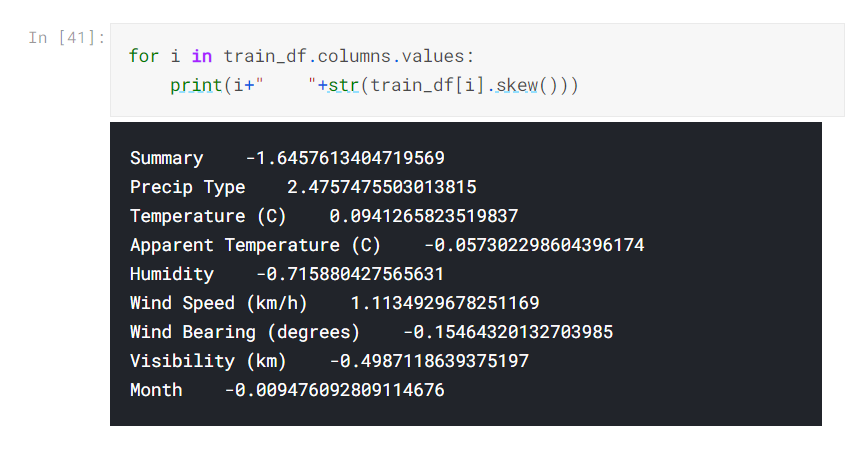ng](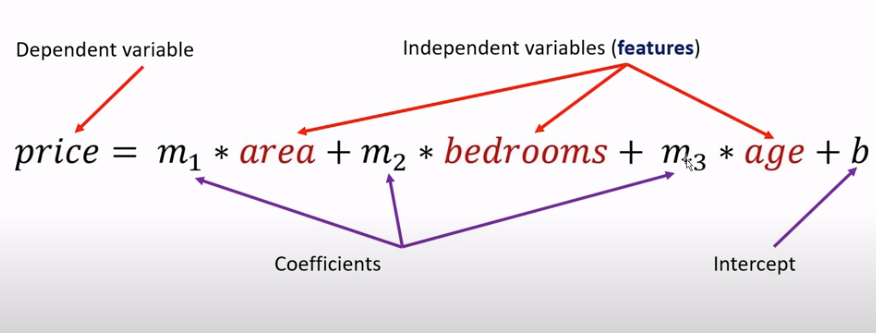)

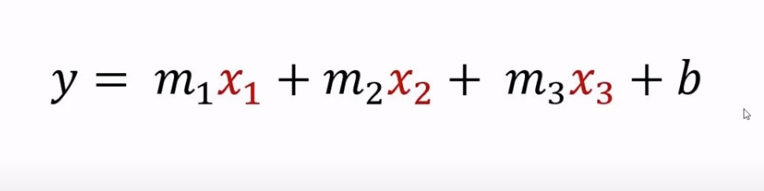

**OBJAŚNIENIE** 

**regresja dla jednego   parametru (kolumny)**

price = m1 * area   +  b

**regresja dla wielu  parametrów (kolumn)**

price = m1 * area  + m2 * bedrooms  + m3 * age  +  b

m = coefficients (współczynniki)
columns name = independent variables / features ( niezależne zmienne / cechy )
b = intercept   ( .... ) 

 


**regresja dla jednego   parametru (kolumny)**

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_ 

array([134.07534247])

In [ ]:
reg.intercept_

176232.87671232875

In [ ]:
# szczegółowo rozpisany wzór 
# price = m * area    +  b
137.25 *  3000    + 176232.87671232875

587982.8767123288

In [ ]:
reg.predict([[3000]])

array([578458.90410959])

**regresja dla wielu  parametrów (kolumn)**


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_   #to jest chyba  wyświetlenie regersji dla każdej kolumny wg wzoru regresji powyżej . coefficients

array([   137.25, -26025.  ,  -6825.  ])

In [ ]:
reg.intercept_   # to jest wyświetlenie naszego B czyli naszego współczynnika wg którego bedziemy chyba mnożyć przyszłe dane

383724.99999999994

In [ ]:
reg.predict([[3000,3,40]])


array([444400.])

In [ ]:
# szczegółowo rozpisany wzór 
# price = m1 *  area  + m2  *  bedrooms  + m3 * age  +  b
137.25 *  3000 + -26025 * 3 +   -6825 * 40   + 383724.99999999994

444399.99999999994

## test - sprawdzenie na prawdziwnych danych z tabeli

In [ ]:
reg.predict([[3000,4,15]])

array([589000.])

In [ ]:
reg.predict([[2600,3,20]])

array([526000.])

In [ ]:
reg.predict([[4000,5,8]])

array([748000.])

# 4: Gradient Descent and Cost Function

https://youtu.be/vsWrXfO3wWw

# 5: Save Model Using Joblib And Pickle

https://github.com/codebasics/py/blob/master/ML/4_save_model/4_save_and_load_model_using_pickle.ipynb

https://youtu.be/KfnhNlD8WZI


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.DataFrame({
    'area': [2600,3000,3200,3600,4000],
    'bedrooms': [3,4, np.nan,3,5],
    'age': [20,15,18,30,8],
    'price': [550000,565000,610000,595000,760000]
    })
import math
median_bedrooms = math.floor(df.bedrooms.median())
df["bedrooms"] = df["bedrooms"].fillna(median_bedrooms)


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])
reg.predict([[3000]])

array([578458.90410959])

## sposob 1: Using Pickle

In [ ]:
import pickle

In [ ]:
# zapisanie modelu do pickle
with open('model_pickle','wb') as file:
    pickle.dump(reg,file)

In [ ]:
#otwarcie zapisanego pliku z picle
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [ ]:
print( "mp.coef_ :", mp.coef_   )
print( "mp.intercept_ :",mp.intercept_  )

mp.coef_ : [134.07534247]
mp.intercept_ : 176232.87671232875


In [ ]:
mp.predict([[3000]])  # zobacz cy się zgadza z wcześniej zrobioną predykcją

array([578458.90410959])

## sposob 2: Using Joblib


In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# zapisanie modelu do joblib
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [ ]:
# odczytanie modelu z joblib
mj = joblib.load('model_joblib')

In [ ]:
print( "mj.coef_ :", mj.coef_   )
print( "mj.intercept_ :",mj.intercept_  )

mj.coef_ : [134.07534247]
mj.intercept_ : 176232.87671232875


In [ ]:
mj.predict([[3000]])

array([578458.90410959])

# 6: Dummy Variables & One Hot Encoding
Pokazanie dwóch metoda (ręcznej) i  automatycznej z biblioteki sklearn (One Hot Encoding)

https://youtu.be/9yl6-HEY7_s

In [90]:
import pandas as pd
import io   # konieczna dodatkowa biblioteka

test = """town,area,price
monroe township,2600,550000
monroe township,3000,565000
monroe township,3200,610000
monroe township,3600,680000
monroe township,4000,725000
west windsor,2600,585000
west windsor,2800,615000
west windsor,3300,650000
west windsor,3600,710000
robinsville,2600,575000
robinsville,2900,600000
robinsville,3100,620000
robinsville,3600,695000"""

data = io.StringIO(test)  
df = pd.read_csv(data, sep=",")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000



## Categorical Variables

transformacja z formy a do b

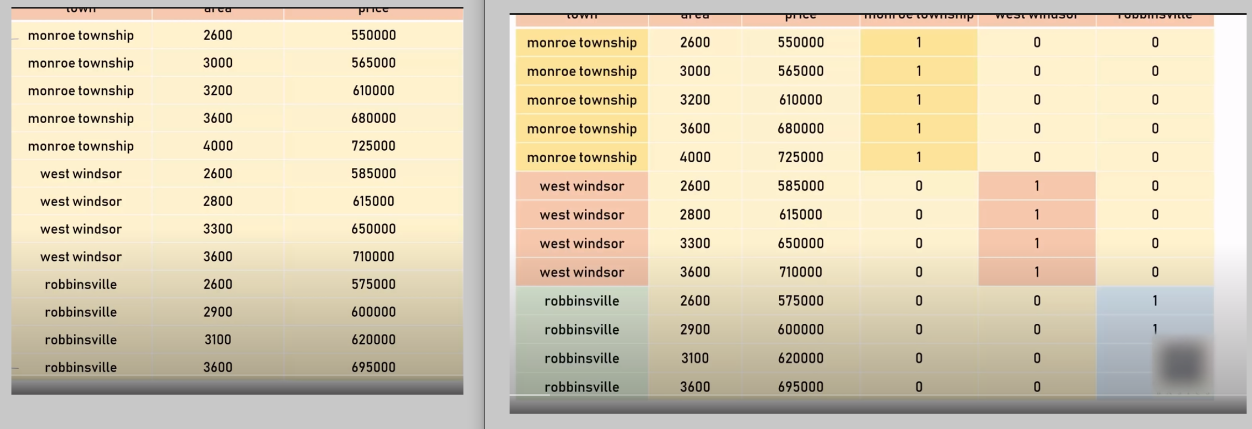

In [61]:
dummies = pd.get_dummies(df["town"])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [64]:
marged = pd.concat([df,dummies], axis="columns")
marged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


**moja interpretacja:**

Nalezy usunać jedną z nowych kolumn kiedy są one wieloliniowe, czyli kiedy analizujac pozostałe można wywnioskować jej wartość. W przeciwnym razie regrejsa liniowa nie bedzie działać prawidłowo. Nazywa się to "fałszywa płapka ang: "Dummy Variable Trap". 

**UWAGA: ** biblioteka sklearn zajmuje się fałszywą pułapką, dlatego nawet jeśli nie upuścisz jednej z kolumn stanu, to zadziała prawidłowo. Jednak powinniśmy mieć nawyk samodzielnego zajmowania się fałszywą pułapką na wypadek, gdyby była to biblioteka która nie obsługuje tego automatycznie


In [66]:
#usunięcie kolumn których nie potrzebujemy do analizy 
final = marged.drop(['town', "west windsor"], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [67]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [69]:
y = final["price"]
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [76]:
model.score(X,y)

0.9573929037221873

In [77]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [78]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

### test dla wartości które były zdefiniowane - dla obu metod te same

In [79]:
model.predict([[2600,1,0]]) # 2600 sqr ft home in monroe township	 - 550 000

array([539709.7398409])

In [80]:
model.predict([[3300,0,0]]) # 3300 sqr ft home in west windsor	 - 650 000

array([668551.92431735])

In [81]:
model.predict([[3600,0,0]]) # 3600 sqr ft home in west windsor	 - 710 000

array([706621.15674048])

## Using sklearn OneHotEncoder

minusy tej funkcji jest to ze robiąc predyckje (  model.predict([[0,1,3600]])  ) nie wiem w jakiej kolejności podane sa dane kolumny/wartości.  
czy 0,1,3600 to   home in west windsor  a może home in robbinsville or monroe township

In [94]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [138]:
dfle = df.copy()
# biblioteka zamieniła str na odpowiadające jej int
dfle["town"] = le.fit_transform(dfle["town"])
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [148]:
X = dfle[['town','area']]
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [140]:
y = dfle["price"]
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

**Now use one hot encoder to create dummy variables for each of the town**

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('town',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [0])],
                  verbose=False)

In [153]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [154]:
X = X[:,1:]  
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [155]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [157]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

### test dla wartości które były zdefiniowane - dla obu metod te same

In [166]:
model.predict([[0,0,2600]]) # 2600 sqr ft home in monroe township	 - 550 000 - w recznej metodzie array([539709.7398409])


array([539709.7398409])

In [164]:
model.predict([[0,1,3300]]) # 3300 sqr ft home in west windsor	 - 650 000 - w recznej metodzie array([668551.92431735])

array([668551.92431735])

In [165]:
model.predict([[0,1,3600]]) # 3600 sqr ft home in west windsor	 - 710 000 - w recznej metodzie array([706621.15674048])

array([706621.15674048])

**test**